# 1. Expectation-Maximization (EM) Algorithm

In many models of interest, especially in Bayesian statistics, we need to consider latent variables.  Before we consider Bayesian approaches for parameter learning with latent variables, we will look at the Expectation Maximization (EM) Algorithm.  The EM algorithm allows us to estimate the maximum likelihood estimates of parameters in latent variable models. 

The EM algorithm will first be presented in general, and then we will consider the EM algorithm applied to Gaussian Mixture Models.  The derivations and layout follow *Pattern Recognition and Machine Learning* by Chris Bishop (https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).

### Notation:

- X = set of observed variables
- Z = set of hidden variables
- $\theta$ = parameters of the model

### Goal: 

Maximize $$p(X | \theta) = \sum_{z}p(X, Z | \theta).$$
However, this maximization in its current form is challenging.  For example, if we take the log of $p(X|\theta)$, we get:

$$\log p(X|\theta) = \log \sum_z p(X, Z | \theta).$$

In general, it will be difficult to maximize $\log p(X|\theta)$, since the log cannot distribute over the sum over $z$.  As a result, to find the maximum likelihood estimates of $\theta$, we will need to use a different approach. $p(X, Z | \theta)$ tends to be much easier to optimize.

The EM Algorithm alternates between an Expectation and Maximization step. In the E-step, we find the expected value of the complete data log-likelihood under the posterior of the latent variables, $Z$. Then in the M-Step, we mazimixe this expectation to update the parameter values, $\theta$.  This iterative process continues until convergence, and at each step, it can be shown that $\log p(X|\theta)$ will increase.

The General EM Algorithm is presented in Section 9.3 of *Pattern Recognition and Machine Learning*:

1. Initialize the parameters, $\theta^{old}$

2. **E-Step**: Calculate $p(Z|X, \theta^{old})$

3. **M-Step**: Update $\theta^{old}$ to $\theta^{new}$, where

$$\theta^{new} = \mbox{arg max}_{\theta} Q(\theta, \theta^{old}),$$
where
$$Q(\theta, \theta^{old}) = \sum_z p(Z|X, \theta^{old})\log p(X, Z |\theta).$$

4. Check for convergence of the log likelihood to a specified tolerance.  If the convergence criteria is not met, then set $\theta^{old} = \theta^{new}$ and return to step 2.

## 2. Gaussian Mixture Models

Gaussian mixture models (GMMs) are often used for clustering and provide a concrete examle of the Expectation-Maximization algorithm. Later tutorials on variational inference will build on the concepts of GMMs here. 

In a Gaussian mixture model, we assume that our observed data $x$ comes from one of $K$ Gaussians.  The distribution of one point $x$ is

$$p(x) = \sum_{k=1}^K \pi_k N(x | \mu_k, \Sigma_k),$$

where $\mu_k$ and $\Sigma_k$ are the mean and standard deviation, respectively, of the Gaussian corresponding to the $k^{th}$ mixture element. 

We can introduce a latent variable $z$ for each observation $x$ that describe which component each observation belongs to.  That is, if $x$ belongs to the 2nd Gaussian mixture component, we would have that $z_2 = 1$.  Thus, $z$ is a one-hot encoded vector of length $K$.  We can also introduce the parameters $\pi_k$, where

$$p(z_k = 1) = \pi_k.$$

$\pi_k$ is the probability that observation $x$ belongs to Gaussian component $k$.  Then, we have that

$$p(z) = \prod_{k=1}^K \pi_k^{z_k}$$
and
$$p(x|z) = \prod_{k=1}^K N(x|\mu_k, \Sigma_k)^{z_k}.$$
Then, we can check that this gives the same expression for $p(x)$:

\begin{align}
p(x) &= \sum_z p(z)p(x|z) = \sum_z \prod_{k=1}^K \pi_k^{z_k} N(x|\mu_k, \Sigma_k)^{z_k}\\
&= \sum_z\prod_{k=1}^K \left(\pi_k N(x|\mu_k, \Sigma_k)\right)^{z_k} \\
&= \pi_1 N(x | \mu_1, \Sigma_1) + \pi_2N(x |\mu_2, \Sigma_2) + \ldots + \pi_k N(x | \mu_k, \Sigma_k) \\
p(x) &= \sum_{k=1}^K \pi_k N(x | \mu_k, \Sigma_k)
\end{align}

For the **E-Step**, we need to find $p(Z|X, \theta^{old})$.  For the Gaussian Mixture Model, $\theta = \{\{\pi_k\}_{k=1}^K, \{\Sigma_k\}_{k=1}^K, \{\mu_k\}_{k=1}^K\}$. Let
$$\gamma (z_k) = p(z_k = 1 | X).$$
Then, by Bayes rule, we have that
\begin{align}
\gamma(z_k) &= p(z_k =1 |X) \\
&= \dfrac{p(z_k = 1)p(X | z_k = 1)}{\sum_{j=1}^K p(z_j = 1)p(X | z_j = 1)} \\
\gamma(z_k) &= \dfrac{\pi_k N(x|\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j N(x|\mu_j, \Sigma_j)}
\end{align}

We can interpret $\pi_k$ as the prior probability that $z_k = 1$, while $\gamma(z_k)$ is the posterior probability that $z_k = 1$ after observing $X$. 

Now, in the **M-Step**, we can update the values of the parameters $\theta$, where $X = \{x_1, \ldots, x_N\}$. Also, let $z_{nk}$ be the latent variable corresponding to the $n^{th}$ data point ($x_n$) and the $k^{th}$ Gaussian component.

\begin{align}
p(X | \pi, \mu, \Sigma) &= \prod_{n=1}^N \left(\sum_{k=1}^K \pi_k N(x_n | \mu_k, \Sigma_k)\right) \\
\log p(X | \pi, \mu, \Sigma) &= \sum_{n=1}^N \log\left(\sum_{k=1}^K \pi_k N(x_n | \mu_k, \Sigma_k)\right) \\
\end{align}


**Update $\mu_k$:**
\begin{align}
\dfrac{\partial \log p(X | \pi, \mu, \Sigma)}{\partial\mu_k} &= \sum_{n=1}^N \dfrac{1}{\sum_j \pi_jN(x_n | \mu_j, \Sigma_j)}\dfrac{\partial}{\partial\mu_k}\left(\sum_j \pi_j N(x_n | \mu_j, \Sigma_j)\right) \\
\dfrac{\partial}{\partial\mu_k}\left(\sum_j \pi_j N(x_n | \mu_j, \Sigma_j)\right) &= \dfrac{\partial}{\partial\mu_k} \pi_kN(x_n |\mu_k, \Sigma_k) \\
&= \pi_k \dfrac{\partial}{\partial\mu_k} |2\pi\Sigma_k|^{-1/2}\mbox{exp}\left(-\frac{1}{2} (x_n - \mu_k)^T\Sigma_k^{-1}(x_n - \mu_k)\right) \\
&= \pi_k  |2\pi\Sigma_k|^{-1/2}\mbox{exp}\left(-\frac{1}{2} (x_n - \mu_k)^T\Sigma_k^{-1}(x_n - \mu_k)\right) \dfrac{\partial}{\partial\mu_k} \left(-\frac{1}{2}(x_n - \mu_k)^T\Sigma_k^{-1}(x_n - \mu_k) \right) \\
&= \pi_k N(x_n | \mu_k, \Sigma_k)\dfrac{\partial}{\partial\mu_k} \left(-\frac{1}{2}(x_n - \mu_k)^T\Sigma_k^{-1}(x_n - \mu_k) \right) \\
\dfrac{\partial}{\partial\mu_k} \left(-\frac{1}{2}(x_n - \mu_k)^T\Sigma_k^{-1}(x_n - \mu_k) \right) &= -\frac{1}{2}(2)\Sigma_k^{-1} (x_n - \mu_k) \\
\dfrac{\partial \log p(X | \pi, \mu, \Sigma)}{\partial\mu_k} &= -\sum_{n=1}^N \dfrac{\pi_k N(x_n |\mu_k, \Sigma_k)}{\sum_j \pi_j N(x_n |\mu_j, \Sigma_j)}\Sigma_k^{-1}(x_n - \mu_k) \\
\dfrac{\partial \log p(X | \pi, \mu, \Sigma)}{\partial\mu_k} &= 0 \\
0 &= -\sum_{n=1}^N \gamma(z_{nk}) \Sigma_k^{-1}(x_n - \mu_k) \\
\Sigma_k (0) &= -\sum_{n=1}^N\gamma(z_{nk})\Sigma_k\Sigma_k^{-1}(x_n - \mu_k) \\
0 &= -\sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k) \\
\sum_{n=1}^N \gamma(z_{nk}) &= \sum_{n=1}^N \gamma(z_{nk})x_n \\
\implies \mu_k^{new} &= \dfrac{\sum_{n=1}^N \gamma(z_{nk})x_n}{\sum_{n=1}^N \gamma(z_{nk})}
\end{align}

Let $$N_k = \sum_{n=1}^N \gamma(z_{nk}).$$
Then, $N_k$ represents the effective number of points assigned to cluster $k$.  We can similarly update $\Sigma_k^{new}$ to get
\begin{aligned}
\mu_k^{new} &= \dfrac{1}{N_k}\sum_{n=1}^N \gamma(z_{nk})x_n \\
\Sigma_k &= \dfrac{1}{N_k} \sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T \\
\end{aligned}

Finally, we can update $\pi_k$.  This is a constrained optimization, since we must have that
$$\sum_{k=1}^K \pi_k = 1.$$
We can introduce the Lagrange multiplier $\lambda$ to solve this optimization:
\begin{align}
\dfrac{\partial}{\partial\pi_k}\left(\log p(X | \pi, \mu, \Sigma) + \lambda\left(\sum\pi_k - 1\right)\right) &= \dfrac{\partial}{\partial\pi_k} \left(\sum_{n=1}^N \log \left(\sum_{k=1}^K \pi_kN(x_n | \mu_k, \Sigma_k)\right) +\lambda \left(\sum\pi_k - 1\right)\right) \\
&= \sum_{n=1}^N \dfrac{N(x_n | \mu_k, \Sigma_k)}{\sum_j\pi_j N(x_n |\mu_j, \Sigma_j)} + \lambda \\
\dfrac{\partial}{\partial\pi_k}\left(\log p(X | \pi, \mu, \Sigma) + \lambda\left(\sum\pi_k - 1\right)\right) &= 0 \\
0 &= \sum_{n=1}^N \dfrac{N(x_n | \mu_k, \Sigma_k)}{\sum_j\pi_j N(x_n |\mu_j, \Sigma_j)} + \lambda \\
&= \sum_{n=1}^N \dfrac{\pi_k N(x_n | \mu_k, \Sigma_k)}{\sum_j\pi_j N(x_n |\mu_j, \Sigma_j)} + \pi_k\lambda \\
&= \sum_{k=1}^K \left(\sum_{n=1}^N \dfrac{\pi_k N(x_n | \mu_k, \Sigma_k)}{\sum_j\pi_j N(x_n |\mu_j, \Sigma_j)} + \pi_k\lambda\right) \mbox{ Sum over k}\\
&= \sum_{n=1}^N\sum_{k=1}^K \dfrac{\pi_k N(x_n | \mu_k, \Sigma_k)}{\sum_j\pi_j N(x_n |\mu_j, \Sigma_j)} + \lambda\sum_{k=1}^K \pi_k \\
&= \sum_{n=1}^N (1) + \lambda(1) \\
\implies \lambda &= -N \\
\end{align}


\begin{align}
\dfrac{\partial}{\partial\pi_k}\left(\log p(X | \pi, \mu, \Sigma) + \lambda\left(\sum\pi_k - 1\right)\right) &= 0 \\
&= \sum_{n=1}^N \dfrac{\pi_kN(x_n | \mu_k, \Sigma_k)}{\sum_j\pi_j N(x_n |\mu_j, \Sigma_j)} + \pi_k\lambda \\
&= \sum_{n=1}^N \gamma(z_{nk}) + \pi_k(-N) \\
\implies \pi_k &= \dfrac{\sum_{n=1}^N \gamma(z_{nk})}{N} = \dfrac{N_k}{N}
\end{align}


$\pi_k$ represents the proportion of points that are assigned to cluster $k$. 



Now, we have all the necessary equations to run the EM algorithm for GMMs:

1. Initialize $\theta^{old} = \{\mu, \Sigma, \pi\}$
2. **E-Step:** For all points $x_n$ and Gaussian components $k$, calculate:
$$\gamma(z_{nk}) = \dfrac{\pi_k N(x_n|\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j N(x_n|\mu_j, \Sigma_j)}$$
3. **M-Step:** Update the parameters
\begin{aligned}
N_k &= \sum_{n=1}^N \gamma(z_{nk}) \\
\pi_k^{new} &= \dfrac{N_k}{N} \\
\mu_k^{new} &= \dfrac{1}{N_k}\sum_{n=1}^N \gamma(z_{nk})x_n \\
\Sigma_k &= \dfrac{1}{N_k} \sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T \\
\end{aligned}
4. Iterate (2) and (3) until the log-likelihood converges

Below, the EM algorithm for GMMs is implemented and run on the Iris data set.  The clusters found by the EM algorithm correspond well to the known Iris clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats
from scipy.stats import multivariate_normal

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

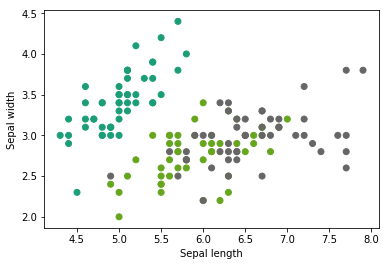

In [3]:
# Plot the data - work with Sepal Width and Sepal Length only
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
pass

In [4]:
# Calculate the log-likelihood to check for convergence
def log_likelihood(X, mu, Sigma, pi, K):
    n, p = X.shape
    ll = 0
    for i in range(n):
        sk = [pi[k]*multivariate_normal.pdf(X[i,:], mu[:, k], Sigma[k]) for k in range(K)]
        ll += np.log(np.sum(sk))
    return(ll)

In [9]:
## X is the data
## K is the number of latent clusters
## crit is convergence criteria
def EM_GMM(X, K, crit):
    n, p = X.shape ## number of data points and number of Gaussian dimensions
    
    # Randomly initialize starting values
    pi = np.random.rand(K)
    pi = pi/np.sum(pi) ## mixing proportions
    mu = np.random.rand(p, K) ## means
    Sigma = [np.eye(p) for i in range(K)] ## covariance
    Sigma_new = [np.zeros((p, p)) for i in range(K)] ## covariance
    
    # Initialize data structures
    ll_old = 10E10
    ll_new = 0
    converge = 10E10 # current difference in log likelihoods to check for convergence
    gamma = np.zeros(shape = (n, K))
    
    while converge > crit:
    
        ## (1).  E-Step 
        for i in range(n):
            gt = [pi[k]*multivariate_normal.pdf(X[i,:], mu[:, k], Sigma[k]) for k in range(K)]
            gamma[i, :] = gt/np.sum(gt)
            
        ## (2). M-Step
        N_k = np.sum(gamma, axis = 0)
        pi_new = N_k/n ## Update pi
        
        mu_new = np.dot(X.transpose(), gamma)/N_k ## update mu
        for k in range(K):
            Sigma_new[k] = sum([gamma[i, k]*np.outer(X[i,:] - mu_new[:, k], 
                                               (X[i,:] - mu_new[:, k]).transpose()) for i in range(n)])/N_k[k]
        
        ## Check for mode collapse
        posdef = [np.all(np.linalg.eigvals(Sigma_new[k]) > 0) for k in range(K)]
        
        if not np.all(posdef):
            ind = np.where(posdef == False)[0]
            print(posdef)
            print(ind)
            Sigma_new[ind] = 10*np.eye(p)
        
        
        ## Check convergence criteria
        ll_new = log_likelihood(X, mu_new, Sigma_new, pi_new, K)
        converge = abs(ll_new - ll_old)
        ll_old = ll_new
        #print(converge)
        
        # Update parameters
        pi = pi_new
        Sigma = Sigma_new
        mu = mu_new
        
    ## Return cluster assignments
    for i in range(n):
        gt = [pi[k]*multivariate_normal.pdf(X[i,:], mu[:, k], Sigma[k]) for k in range(K)]
        gamma[i, :] = gt/np.sum(gt)
    Z = np.argmax(gamma, axis = 1)
    return(pi, mu, Sigma, Z, gamma)
                

In [10]:
pi, mu, Sigma, Z, gamma = EM_GMM(X, 3, 1E-3)

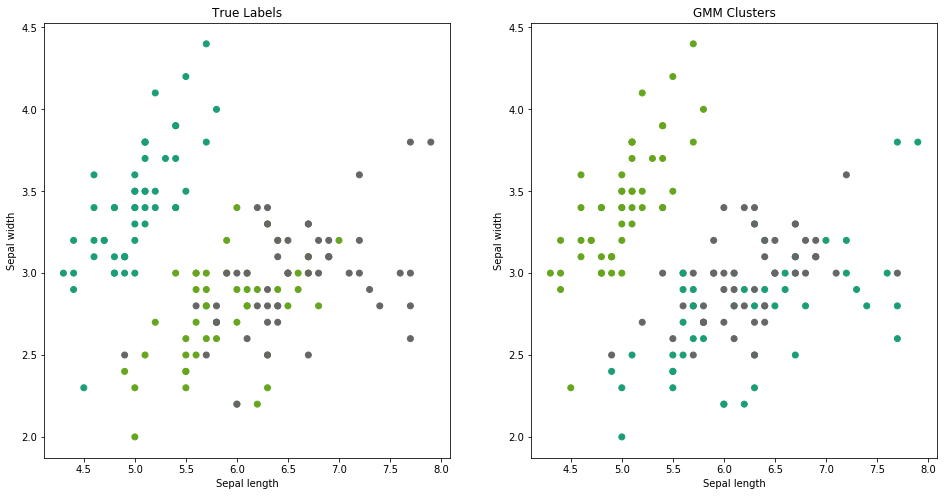

In [11]:
# Plot the data - work with Sepal Width and Sepal Length only
plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('True Labels')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=Z, cmap = "Dark2")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("GMM Clusters")
pass

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## References

*Pattern Recognition and Machine Learning* by Chris Bishop (https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)